In [34]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [35]:
flag = True
for i in tqdm(range(3200)):
    d = "/media/takuya/exHDD/M1/result/2022_02_07/piv/gx_48_gy_48_t_48_s_48_th_30/_60/"
    if flag:
        flag = False
        dx = np.loadtxt(d + f"dx_{i}_{i+1}.csv", delimiter=',')
        dy = np.loadtxt(d + f"dy_{i}_{i+1}.csv", delimiter=',')
        dx_c = np.where(dx==np.nan, 0, 1)
        dy_c = np.where(dy==np.nan, 0, 1)
    else:
        dx = np.nansum([dx, np.loadtxt(d + f"dx_{i}_{i+1}.csv", delimiter=',')], axis=0)
        dy = np.nansum([dy, np.loadtxt(d + f"dy_{i}_{i+1}.csv", delimiter=',')], axis=0)
        dx_c += np.where(np.loadtxt(d + f"dx_{i}_{i+1}.csv", delimiter=',')==np.nan, 0, 1)
        dy_c += np.where(np.loadtxt(d + f"dy_{i}_{i+1}.csv", delimiter=',')==np.nan, 0, 1)

dx /= dx_c
dy /= dy_c


100%|██████████| 3200/3200 [00:13<00:00, 241.05it/s]


In [36]:
width, height = 739, 692
n = 48

x, y = np.meshgrid(np.linspace(width, 0, n, dtype="int"), np.linspace(0, height, n, dtype="int"))

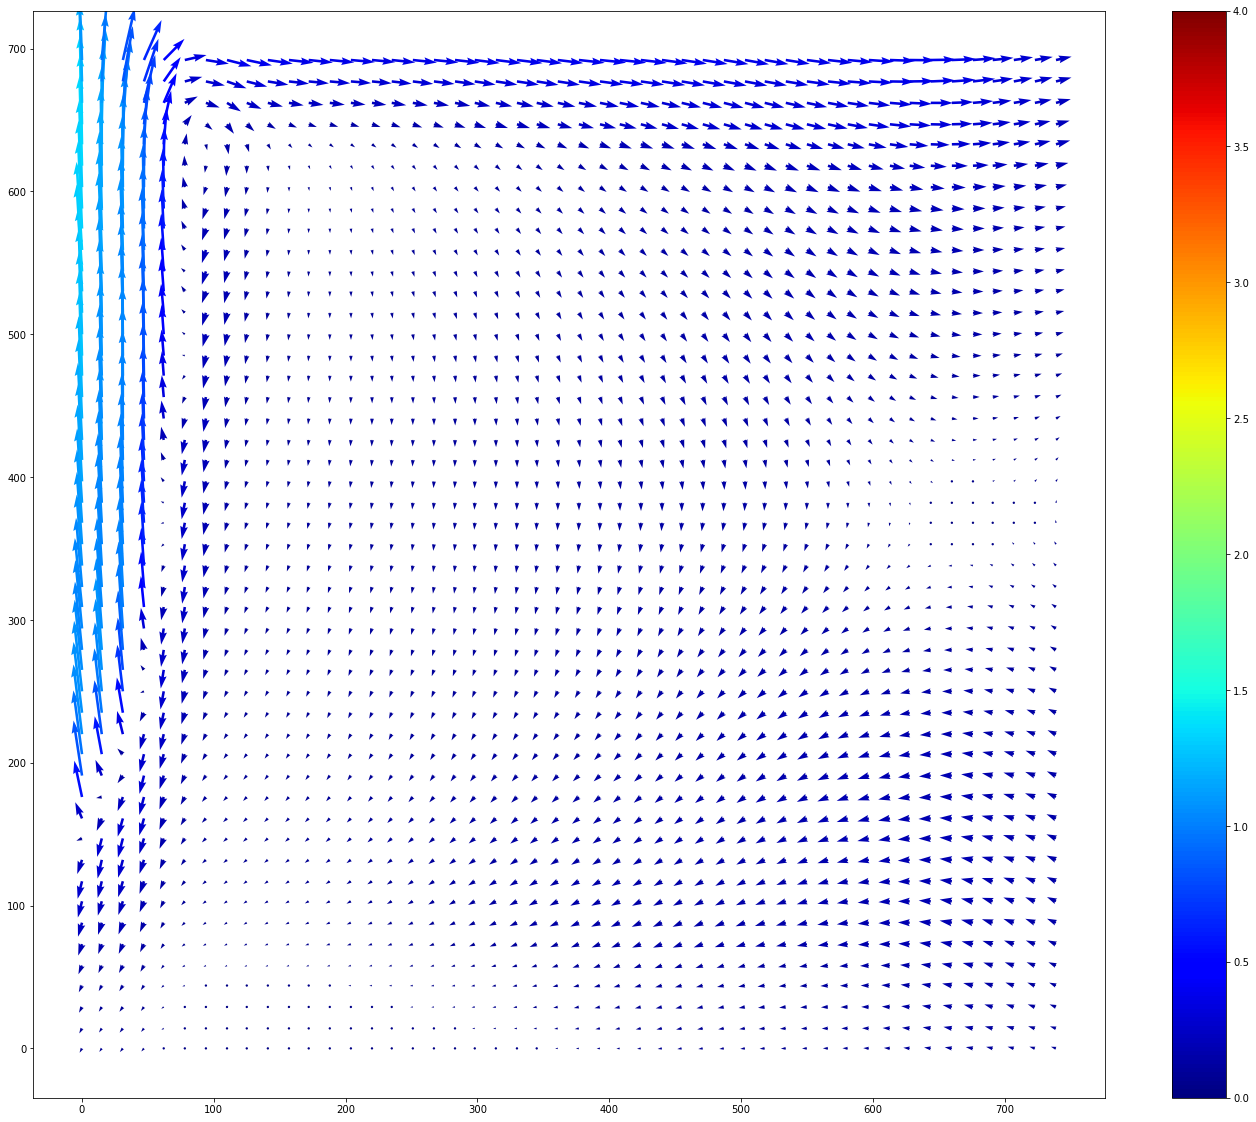

In [37]:
fig, ax = plt.subplots(figsize=(24, 20))
c = np.sqrt(dx**2 + dy**2)
im = ax.quiver(x, y, -dx, dy, c, cmap="jet")
fig.colorbar(im)
im.set_clim(0, 4)
plt.show()